<a href="https://colab.research.google.com/github/mdna-j/CS471/blob/main/CS_471_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Test Case 1 Output: True


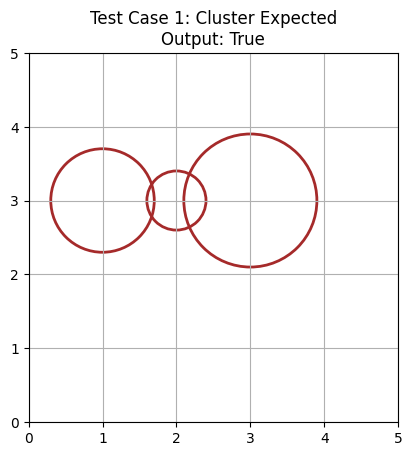



Test Case 2 Output: False


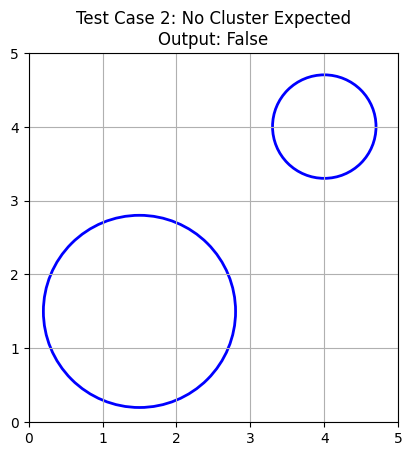



Test Case 3 Output: False


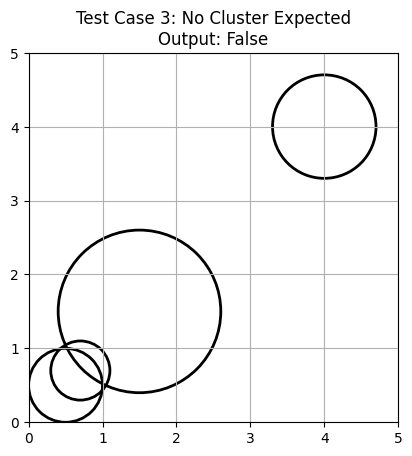



Test Case 4 Output: True


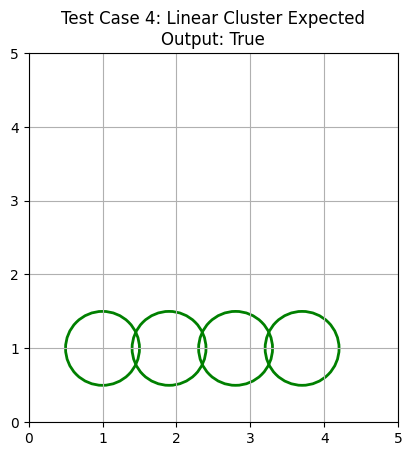

In [ ]:
from typing import List, Tuple
import math
import matplotlib.pyplot as plt

# Defines a Circle as a tuple with (x-coordinate, y-coordinate, radius)
Circle = Tuple[float, float, float]

# ----------------------------------------------
# Check if two circles overlap based on distance
# ----------------------------------------------
def overlapping_Circles(c1: Circle, c2: Circle) -> bool:
    x1, y1, r1 = c1
    x2, y2, r2 = c2
    # Compute Euclidean distance between the centers
    distance = math.hypot(x2 - x1, y2 - y1)
    # Circles overlap if distance is less than or equal to the sum of their radii
    return distance <= r1 + r2

# -----------------------------------------------------
# Build an adjacency list (graph) based on overlaps
# -----------------------------------------------------
def build_Graph(circles: List[Circle]) -> List[List[int]]:
    n = len(circles)
    graph = [[] for _ in range(n)]  # Create empty adjacency list for each circle
    for i in range(n):
        for j in range(i + 1, n):
            # If circles i and j overlap, add edges both ways
            if overlapping_Circles(circles[i], circles[j]):
                graph[i].append(j)
                graph[j].append(i)
    return graph

# -----------------------------------
# Depth-First Search to explore graph
# -----------------------------------
def dfs(graph: List[List[int]], start: int, visited: set):
    visited.add(start)
    for neighbor in graph[start]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited)

# ----------------------------------------------------------------
# Check if all circles are reachable from the first (i.e., cluster)
# ----------------------------------------------------------------
def is_Cluster(circles: List[Circle]) -> bool:
    if not circles:
        return False  # No circles = no cluster
    graph = build_Graph(circles)  # Build connectivity graph
    visited = set()
    dfs(graph, 0, visited)  # Traverse from the first circle
    return len(visited) == len(circles)  # Cluster if all are visited

# ---------------------------------------------------------
# Visualization using matplotlib to show circle connections
# ---------------------------------------------------------
def plot_Circles(circles: List[Circle], title: str, output: bool, color: str):
    fig, ax = plt.subplots()
    for x, y, r in circles:
        # Draw each circle as an outline (not filled)
        ax.add_patch(plt.Circle((x, y), r, fill=False, color=color, linewidth=2))
    ax.set_xlim(0, 5)  # Set X-axis viewing range
    ax.set_ylim(0, 5)  # Set Y-axis viewing range
    ax.set_aspect('equal')  # Equal aspect ratio
    ax.set_title(f"{title}\nOutput: {output}")  # Plot title and result
    plt.grid(True)
    plt.show()

# -------------------------------
# Test Cases with Visualization
# -------------------------------

# Test Case 1: All circles overlap to form a single cluster
circles1 = [(1, 3, 0.7), (2, 3, 0.4), (3, 3, 0.9)]
result1 = is_Cluster(circles1)
print("Test Case 1 Output:", result1)
plot_Circles(circles1, "Test Case 1: Cluster Expected", result1, "brown")

# Test Case 2: Two circles far apart → no cluster
circles2 = [(1.5, 1.5, 1.3), (4, 4, 0.7)]
result2 = is_Cluster(circles2)
print("\n")
print("Test Case 2 Output:", result2)
plot_Circles(circles2, "Test Case 2: No Cluster Expected", result2, "blue")

# Test Case 3: Three nearby circles and one isolated → no cluster
circles3 = [(0.5, 0.5, 0.5), (1.5, 1.5, 1.1), (0.7, 0.7, 0.4), (4, 4, 0.7)]
result3 = is_Cluster(circles3)
print("\n")
print("Test Case 3 Output:", result3)
plot_Circles(circles3, "Test Case 3: No Cluster Expected", result3, "black")

# Test Case 4: Linear chain of overlapping circles → forms a cluster
circles4 = [(1, 1, 0.5), (1.9, 1, 0.5), (2.8, 1, 0.5), (3.7, 1, 0.5)]
result4 = is_Cluster(circles4)
print("\n")
print("Test Case 4 Output:", result4)
plot_Circles(circles4, "Test Case 4: Linear Cluster Expected", result4, "green")
